In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the dataset
file_path = 'Landslides.csv'
landslides_df = pd.read_csv(file_path)

## Building the Severity Prediction Model(Random Forest)

In [ ]:
# Data Preparation without preprocessing the data


landslides_df['severity_index'] = landslides_df['fatality_count'] + landslides_df['injury_count']


data = landslides_df[['latitude', 'longitude', 'event_date', 'landslide_trigger', 'severity_index']].dropna()


data['event_date'] = pd.to_datetime(data['event_date'], errors='coerce')
data = data.dropna(subset=['event_date'])
data['month'] = data['event_date'].dt.month
data['year'] = data['event_date'].dt.year


data['landslide_trigger_encoded'] = data['landslide_trigger'].astype('category').cat.codes


X = data[['latitude', 'longitude', 'month', 'year', 'landslide_trigger_encoded']]
y = data['severity_index']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = RandomForestRegressor(random_state=42, n_estimators=100)

In [5]:
# Train the model
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [6]:
# Step 5: Model Evaluation
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

In [7]:
# Print the evaluation metrics without pre processing
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Absolute Error (MAE): 5.0810885028949535
Mean Squared Error (MSE): 2592.0034332349965
Root Mean Squared Error (RMSE): 50.9117219629723


### Data Cleaning and Preprocessing

In [ ]:

landslides_df = landslides_df[landslides_df['landslide_trigger'] != 'unknown']
landslides_df = landslides_df.dropna(subset=['fatality_count', 'injury_count', 'latitude', 'longitude'])

landslides_df['severity_index'] = landslides_df['fatality_count'] + landslides_df['injury_count']

In [ ]:

data = landslides_df[['latitude', 'longitude', 'event_date', 'landslide_trigger', 'severity_index']]


data['event_date'] = pd.to_datetime(data['event_date'], errors='coerce')
data = data.dropna(subset=['event_date'])
data['month'] = data['event_date'].dt.month
data['year'] = data['event_date'].dt.year

<ipython-input-9-75b3f86e2685>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['event_date'] = pd.to_datetime(data['event_date'], errors='coerce')


In [ ]:

data['is_monsoon'] = data['month'].apply(lambda x: 1 if x in [6, 7, 8, 9] else 0)


data['landslide_trigger_encoded'] = data['landslide_trigger'].astype('category').cat.codes

In [ ]:

severity_threshold = data['severity_index'].quantile(0.95)
data = data[data['severity_index'] <= severity_threshold]


X = data[['latitude', 'longitude', 'month', 'year', 'is_monsoon', 'landslide_trigger_encoded']]
y = data['severity_index']

In [ ]:

scaler = StandardScaler()
X[['latitude', 'longitude', 'month', 'year']] = scaler.fit_transform(X[['latitude', 'longitude', 'month', 'year']])

<ipython-input-12-773c306e1ec5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[['latitude', 'longitude', 'month', 'year']] = scaler.fit_transform(X[['latitude', 'longitude', 'month', 'year']])


In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = RandomForestRegressor(random_state=42, n_estimators=100)

In [14]:
# Train the model
model.fit(X_train, y_train)

# Model Evaluation
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

In [15]:
# Print the evaluation metrics after preprocessing data
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Absolute Error (MAE): 0.9620252764612953
Mean Squared Error (MSE): 3.3415869594523433
Root Mean Squared Error (RMSE): 1.828000809478033


Summary of Improvements:

Handling Missing and Unknown Values helped to reduce noise in the data.
Feature Engineering with Seasonal Indicator allowed the model to learn seasonality patterns, improving its understanding of landslide risk.
Outlier Removal prevented extreme cases from skewing the results, focusing the model on more typical events.
Feature Scaling ensured that all features contributed appropriately to the model.

## Gradient Boosting and XGBoost (without data pre processing)

In [ ]:
# Data Preparation

landslides_df['severity_index'] = landslides_df['fatality_count'] + landslides_df['injury_count']


data = landslides_df[['latitude', 'longitude', 'event_date', 'landslide_trigger', 'severity_index']].dropna()
data = data[data['landslide_trigger'] != 'unknown']  


data['event_date'] = pd.to_datetime(data['event_date'], errors='coerce')
data = data.dropna(subset=['event_date'])
data['month'] = data['event_date'].dt.month
data['year'] = data['event_date'].dt.year


data['landslide_trigger_encoded'] = data['landslide_trigger'].astype('category').cat.codes


X = data[['latitude', 'longitude', 'month', 'year', 'landslide_trigger_encoded']]
y = data['severity_index']

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


def evaluate_model(model, X_train, X_test, y_train, y_test):
    # Train the model
    model.fit(X_train, y_train)
    # Predict on test set
    y_pred = model.predict(X_test)
    # Calculate metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    return mae, mse, rmse

In [ ]:

print("Gradient Boosting Regressor Results:")
gbr_model = GradientBoostingRegressor(random_state=42)
gbr_mae, gbr_mse, gbr_rmse = evaluate_model(gbr_model, X_train, X_test, y_train, y_test)
print("MAE:", gbr_mae)
print("MSE:", gbr_mse)
print("RMSE:", gbr_rmse)


print("\nXGBoost Regressor Results:")
xgb_model = XGBRegressor(random_state=42, n_estimators=100, learning_rate=0.1)
xgb_mae, xgb_mse, xgb_rmse = evaluate_model(xgb_model, X_train, X_test, y_train, y_test)
print("MAE:", xgb_mae)
print("MSE:", xgb_mse)
print("RMSE:", xgb_rmse)

Gradient Boosting Regressor Results:
MAE: 5.017110077899697
MSE: 224.0943077070936
RMSE: 14.969779814916905

XGBoost Regressor Results:
MAE: 6.141177581615584
MSE: 1924.2956579819484
RMSE: 43.86679448035779


The Gradient Boosting Regressor outperformed both Random Forest and XGBoost models in terms of accuracy and error reduction, making it the preferred choice for this dataset.

## After data pre-processing


In [ ]:
# Data Preparation


landslides_df = landslides_df[landslides_df['landslide_trigger'] != 'unknown']
landslides_df = landslides_df.dropna(subset=['fatality_count', 'injury_count', 'latitude', 'longitude'])


landslides_df['severity_index'] = landslides_df['fatality_count'] + landslides_df['injury_count']


data = landslides_df[['latitude', 'longitude', 'event_date', 'landslide_trigger', 'severity_index']]


data['event_date'] = pd.to_datetime(data['event_date'], errors='coerce')
data = data.dropna(subset=['event_date'])
data['month'] = data['event_date'].dt.month
data['year'] = data['event_date'].dt.year




data['is_monsoon'] = data['month'].apply(lambda x: 1 if x in [6, 7, 8, 9] else 0)


data['landslide_trigger_encoded'] = data['landslide_trigger'].astype('category').cat.codes


severity_threshold = data['severity_index'].quantile(0.95)
data = data[data['severity_index'] <= severity_threshold]


X = data[['latitude', 'longitude', 'month', 'year', 'is_monsoon', 'landslide_trigger_encoded']]
y = data['severity_index']


scaler = StandardScaler()
X[['latitude', 'longitude', 'month', 'year']] = scaler.fit_transform(X[['latitude', 'longitude', 'month', 'year']])

<ipython-input-19-0624e0d643d9>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['event_date'] = pd.to_datetime(data['event_date'], errors='coerce')
<ipython-input-19-0624e0d643d9>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[['latitude', 'longitude', 'month', 'year']] = scaler.fit_transform(X[['latitude', 'longitude', 'month', 'year']])


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    return mae, mse, rmse

In [ ]:

print("Gradient Boosting Regressor Results:")
gbr_model = GradientBoostingRegressor(random_state=42)
gbr_mae, gbr_mse, gbr_rmse = evaluate_model(gbr_model, X_train, X_test, y_train, y_test)
print("MAE:", gbr_mae)
print("MSE:", gbr_mse)
print("RMSE:", gbr_rmse)


print("\nXGBoost Regressor Results:")
xgb_model = XGBRegressor(random_state=42, n_estimators=100, learning_rate=0.1)
xgb_mae, xgb_mse, xgb_rmse = evaluate_model(xgb_model, X_train, X_test, y_train, y_test)
print("MAE:", xgb_mae)
print("MSE:", xgb_mse)
print("RMSE:", xgb_rmse)

Gradient Boosting Regressor Results:
MAE: 1.029216458105366
MSE: 3.276792856239127
RMSE: 1.810191386632675

XGBoost Regressor Results:
MAE: 0.9688212811407966
MSE: 3.2470481206817063
RMSE: 1.8019567477277878


Explanation of Adjustments
- Removed 'unknown' triggers and handled missing values in latitude, longitude, fatality_count, and injury_count.
- Created a severity index as the target variable.
- Feature Engineering:
Added is_monsoon to indicate the monsoon season.
Encoded landslide_trigger for numerical representation.
- Outlier Removal: Limited the severity index to the 95th percentile to remove extreme cases.
Scaling: Standardized numeric features.


## Visualization of Models:

In [ ]:
y_pred_gbr = gbr_model.predict(X_test)
y_pred_xgb = xgb_model.predict(X_test)

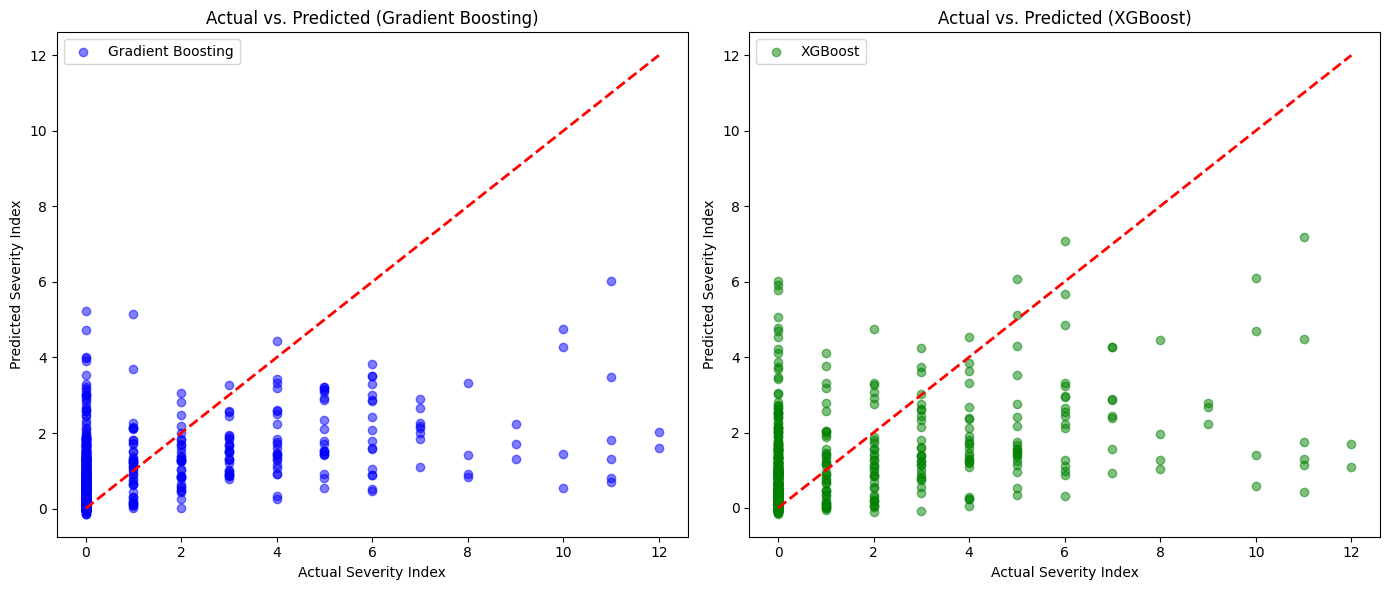

In [23]:
# 1. Scatter Plot of Actual vs. Predicted
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_gbr, alpha=0.5, color='blue', label='Gradient Boosting')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel('Actual Severity Index')
plt.ylabel('Predicted Severity Index')
plt.title('Actual vs. Predicted (Gradient Boosting)')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_xgb, alpha=0.5, color='green', label='XGBoost')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel('Actual Severity Index')
plt.ylabel('Predicted Severity Index')
plt.title('Actual vs. Predicted (XGBoost)')
plt.legend()

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Residual Plot (XGBoost)')

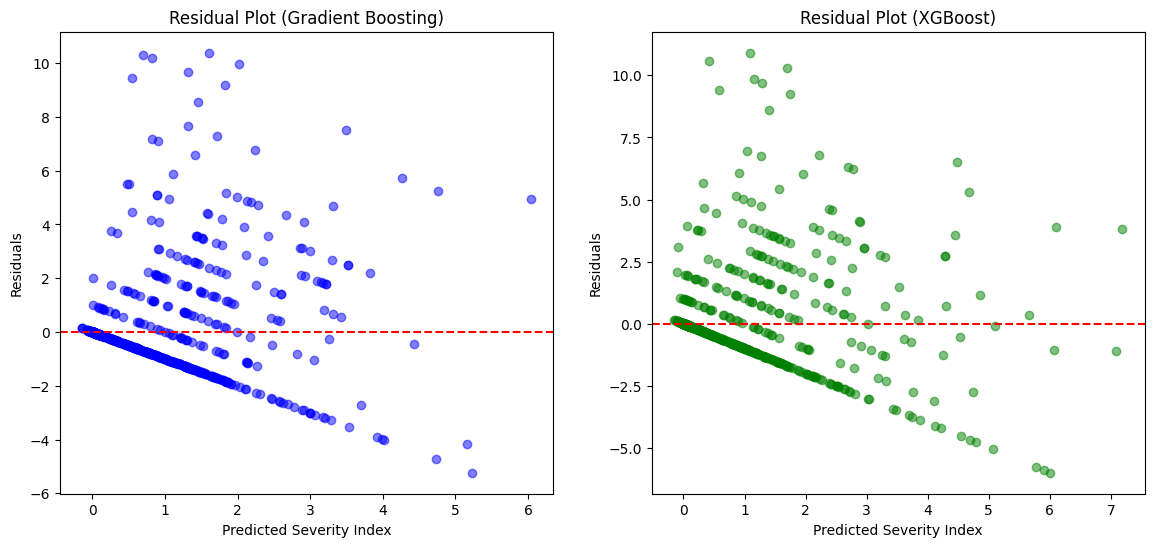

In [24]:
# 2. Residual Plot
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
residuals_gbr = y_test - y_pred_gbr
plt.scatter(y_pred_gbr, residuals_gbr, alpha=0.5, color='blue')
plt.axhline(0, color='r', linestyle='--')
plt.xlabel('Predicted Severity Index')
plt.ylabel('Residuals')
plt.title('Residual Plot (Gradient Boosting)')

plt.subplot(1, 2, 2)
residuals_xgb = y_test - y_pred_xgb
plt.scatter(y_pred_xgb, residuals_xgb, alpha=0.5, color='green')
plt.axhline(0, color='r', linestyle='--')
plt.xlabel('Predicted Severity Index')
plt.ylabel('Residuals')
plt.title('Residual Plot (XGBoost)')

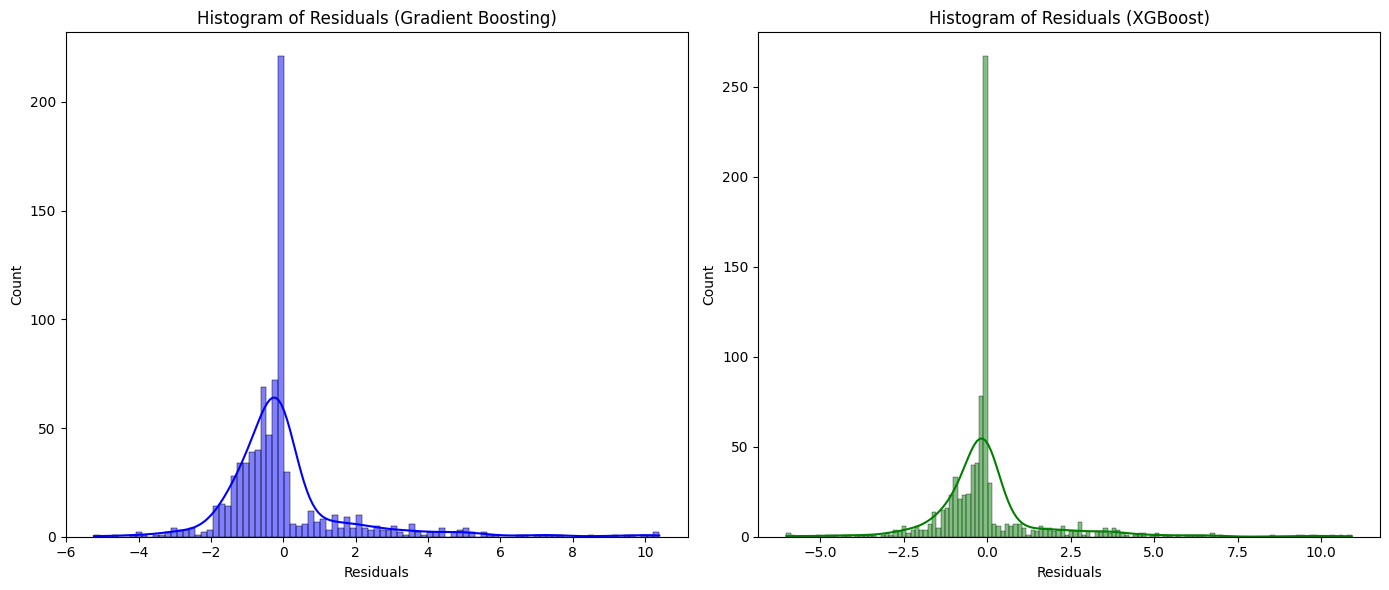

In [25]:
# 3. Histogram of Residuals
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(residuals_gbr, kde=True, color='blue')
plt.xlabel('Residuals')
plt.title('Histogram of Residuals (Gradient Boosting)')

plt.subplot(1, 2, 2)
sns.histplot(residuals_xgb, kde=True, color='green')
plt.xlabel('Residuals')
plt.title('Histogram of Residuals (XGBoost)')

plt.tight_layout()
plt.show()

## Making predictions to test the model:

In [ ]:
import numpy as np


def make_prediction(latitude, longitude, month, year, landslide_trigger, scaler, gbr_model, xgb_model):
    landslide_trigger_map = {
        category: code for code, category in enumerate(data['landslide_trigger'].astype('category').cat.categories)
    }
    trigger_encoded = landslide_trigger_map.get(landslide_trigger, -1)

    if trigger_encoded == -1:
        print(f"Unknown trigger '{landslide_trigger}'. Please use one of the known triggers: {list(landslide_trigger_map.keys())}")
        return None

    is_monsoon = 1 if month in [6, 7, 8, 9] else 0
    input_data = np.array([[latitude, longitude, month, year, is_monsoon, trigger_encoded]])

    input_data[:, :4] = scaler.transform(input_data[:, :4])

    gbr_prediction = gbr_model.predict(input_data)[0]
    xgb_prediction = xgb_model.predict(input_data)[0]

    print(f"Predicted Severity Index (Gradient Boosting): {gbr_prediction:.2f}")
    print(f"Predicted Severity Index (XGBoost): {xgb_prediction:.2f}")

    return gbr_prediction, xgb_prediction

latitude = 28.6139
longitude = 77.2090
month = 8  # July, monsoon month
year = 2023
landslide_trigger = 'downpour'  
make_prediction(latitude, longitude, month, year, landslide_trigger, scaler, gbr_model, xgb_model)

Predicted Severity Index (Gradient Boosting): 2.95
Predicted Severity Index (XGBoost): 2.95


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


(2.9534743714866885, 2.949893)